In [119]:
import torch
import torchvision
import torchvision.datasets as datasets
from sklearn.model_selection import train_test_split
from torch import nn,optim
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt



Load **MNIST** dataset

In [120]:
T = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
train = datasets.MNIST(root = "./data", train =True , download=True , transform =T)
test = datasets.MNIST(root = "./data", train =False , download=True , transform =T)
dataset = torch.utils.data.ConcatDataset([train, test])

train_set,val_set=train_test_split(dataset, test_size=0.2, random_state=42)


In [121]:
len(train_set)

56000

**Split data to training and validate**

In [122]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=False)

In [123]:
len(train_loader)

875

**Neural Network architecture**

In [124]:
class NN(nn.Module):
    def __init__(self):
        super(NN,self).__init__()
        self.linear1 = nn.Linear(28*28,128)
        self.linear2 = nn.Linear(128,64)
        self.linear3 = nn.Linear(64,32)
        self.final_linear = nn.Linear(32,10)

    def forward(self,images):
        x = images.view(-1,28 * 28)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = self.final_linear(x)
        return F.softmax(x,dim=1)


**initialize the model and its loss function**

In [125]:
model=NN()
loss = nn.CrossEntropyLoss()
params=model.parameters()
optimizer=optim.SGD(params=params,lr=0.01)

**Define training and validating functions**

In [126]:
def train (model,train_loader,optimizer,loss):
    model.train()
    running_loss=0.0
    correct=0
    total=0
    for i,(images,labels) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(images)
        single_loss=loss(output,labels)
        single_loss.backward()
        optimizer.step()
        running_loss+=single_loss.item()
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    return running_loss / len(train_loader), correct / total




def validate(model, val_loader, loss):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            output = model(images)
            val_loss += loss(output, labels).item()
            _, predicted = torch.max(output, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return val_loss / len(val_loader), correct / total


**Training loop**

In [128]:
# Training Loop
epochs = 15
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, loss)
    val_loss, val_acc = validate(model, val_loader, loss)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    print(f"Epoch [{epoch+1}/{epochs}] => Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, train Accuracy: {train_acc:.4f}, Val Accuracy: {val_acc:.4f}")

Epoch [1/15] => Train Loss: 1.7730, Val Loss: 1.7571, train Accuracy: 0.7255, Val Accuracy: 0.7337
Epoch [2/15] => Train Loss: 1.7439, Val Loss: 1.7344, train Accuracy: 0.7427, Val Accuracy: 0.7479
Epoch [3/15] => Train Loss: 1.7250, Val Loss: 1.7190, train Accuracy: 0.7564, Val Accuracy: 0.7602
Epoch [4/15] => Train Loss: 1.7102, Val Loss: 1.7063, train Accuracy: 0.7687, Val Accuracy: 0.7706
Epoch [5/15] => Train Loss: 1.6982, Val Loss: 1.6962, train Accuracy: 0.7778, Val Accuracy: 0.7789
Epoch [6/15] => Train Loss: 1.6883, Val Loss: 1.6877, train Accuracy: 0.7859, Val Accuracy: 0.7854
Epoch [7/15] => Train Loss: 1.6803, Val Loss: 1.6804, train Accuracy: 0.7930, Val Accuracy: 0.7919
Epoch [8/15] => Train Loss: 1.6736, Val Loss: 1.6743, train Accuracy: 0.7982, Val Accuracy: 0.7958
Epoch [9/15] => Train Loss: 1.6681, Val Loss: 1.6690, train Accuracy: 0.8031, Val Accuracy: 0.8015
Epoch [10/15] => Train Loss: 1.6634, Val Loss: 1.6648, train Accuracy: 0.8069, Val Accuracy: 0.8056
Epoch [11

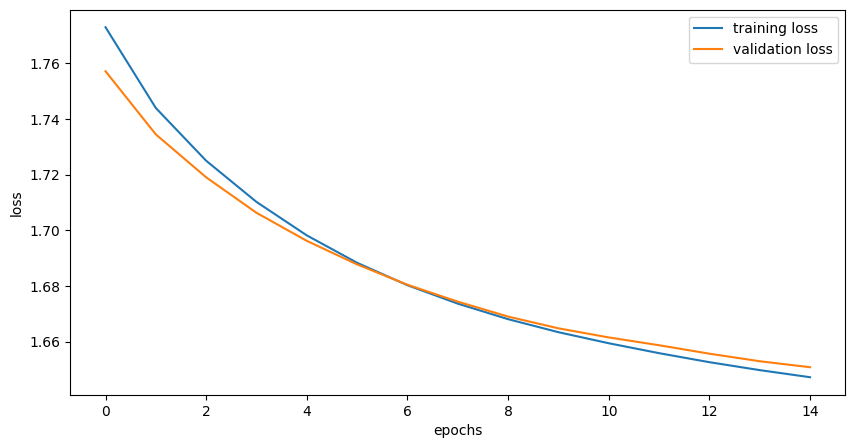

In [129]:
plt.figure(figsize = (10,5))
plt.plot(train_losses, label = 'training loss')
plt.plot(val_losses, label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


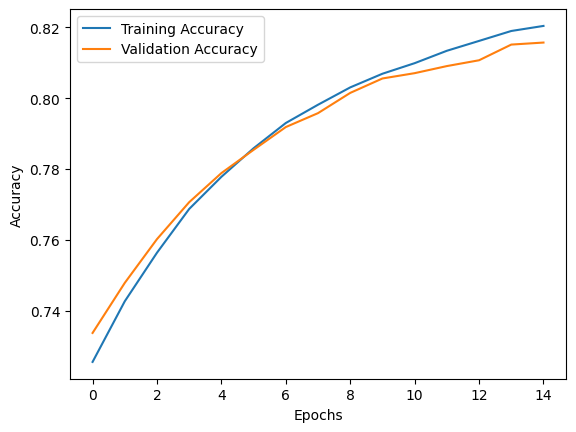

In [130]:
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


**Trying diffrent batch sizes**

In [133]:
batch_sizes=[32,64,128,256,512]
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
epochs=15
for i,bs in enumerate(batch_sizes):
  model=NN()
  optimizer=optim.SGD(params=model.parameters(),lr=0.01)
  train_loader = torch.utils.data.DataLoader(train_set, batch_size=bs, shuffle=True)
  val_loader = torch.utils.data.DataLoader(val_set, batch_size=bs, shuffle=False)
  for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, loss)
    val_loss, val_acc = validate(model, val_loader, loss)
  train_losses.append(train_loss)
  val_losses.append(val_loss)
  train_accuracies.append(train_acc)
  val_accuracies.append(val_acc)
  print(f"batch size {bs}=> Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, train Accuracy: {train_acc:.4f}, Val Accuracy: {val_acc:.4f}")


batch size 32=> Train Loss: 1.7057, Val Loss: 1.7069, train Accuracy: 0.7582, Val Accuracy: 0.7574
batch size 64=> Train Loss: 1.9643, Val Loss: 1.9180, train Accuracy: 0.5272, Val Accuracy: 0.5745
batch size 128=> Train Loss: 2.2891, Val Loss: 2.2871, train Accuracy: 0.2013, Val Accuracy: 0.2022
batch size 256=> Train Loss: 2.3003, Val Loss: 2.3001, train Accuracy: 0.1582, Val Accuracy: 0.1674
batch size 512=> Train Loss: 2.3015, Val Loss: 2.3015, train Accuracy: 0.1179, Val Accuracy: 0.1194


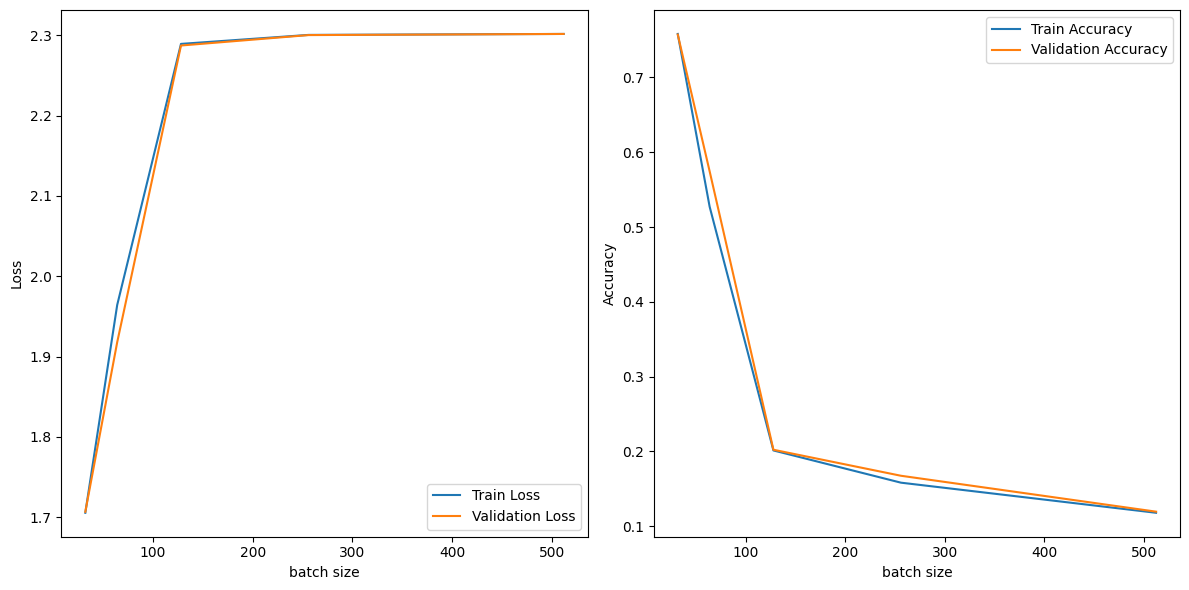

In [134]:
plt.figure(figsize=(12, 6))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(batch_sizes, train_losses, label='Train Loss')
plt.plot(batch_sizes, val_losses, label='Validation Loss')
plt.xlabel('batch size')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(batch_sizes, train_accuracies, label='Train Accuracy')
plt.plot(batch_sizes, val_accuracies, label='Validation Accuracy')
plt.xlabel('batch size')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**Trying diffrent learning rates**

In [135]:
learning_rates=[0.001,0.002,0.01,0.05,0.1,0.2,0.5,1]
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=False)
for i,ls in enumerate(learning_rates):
  model=NN()
  optimizer=optim.SGD(params=model.parameters(),lr=ls)
  for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, loss)
    val_loss, val_acc = validate(model, val_loader, loss)
  train_losses.append(train_loss)
  val_losses.append(val_loss)
  train_accuracies.append(train_acc)
  val_accuracies.append(val_acc)
  print(f"learning rate {ls}=> Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, train Accuracy: {train_acc:.4f}, Val Accuracy: {val_acc:.4f}")

learning rate 0.001=> Train Loss: 2.3023, Val Loss: 2.3024, train Accuracy: 0.1002, Val Accuracy: 0.0986
learning rate 0.002=> Train Loss: 2.3005, Val Loss: 2.3003, train Accuracy: 0.1162, Val Accuracy: 0.1182
learning rate 0.01=> Train Loss: 1.7705, Val Loss: 1.7556, train Accuracy: 0.7079, Val Accuracy: 0.7194
learning rate 0.05=> Train Loss: 1.6454, Val Loss: 1.6111, train Accuracy: 0.8179, Val Accuracy: 0.8539
learning rate 0.1=> Train Loss: 1.6742, Val Loss: 1.6836, train Accuracy: 0.7854, Val Accuracy: 0.7753
learning rate 0.2=> Train Loss: 1.4833, Val Loss: 1.4996, train Accuracy: 0.9787, Val Accuracy: 0.9621
learning rate 0.5=> Train Loss: 1.4849, Val Loss: 1.4941, train Accuracy: 0.9764, Val Accuracy: 0.9669
learning rate 1=> Train Loss: 2.1403, Val Loss: 2.1153, train Accuracy: 0.3209, Val Accuracy: 0.3458


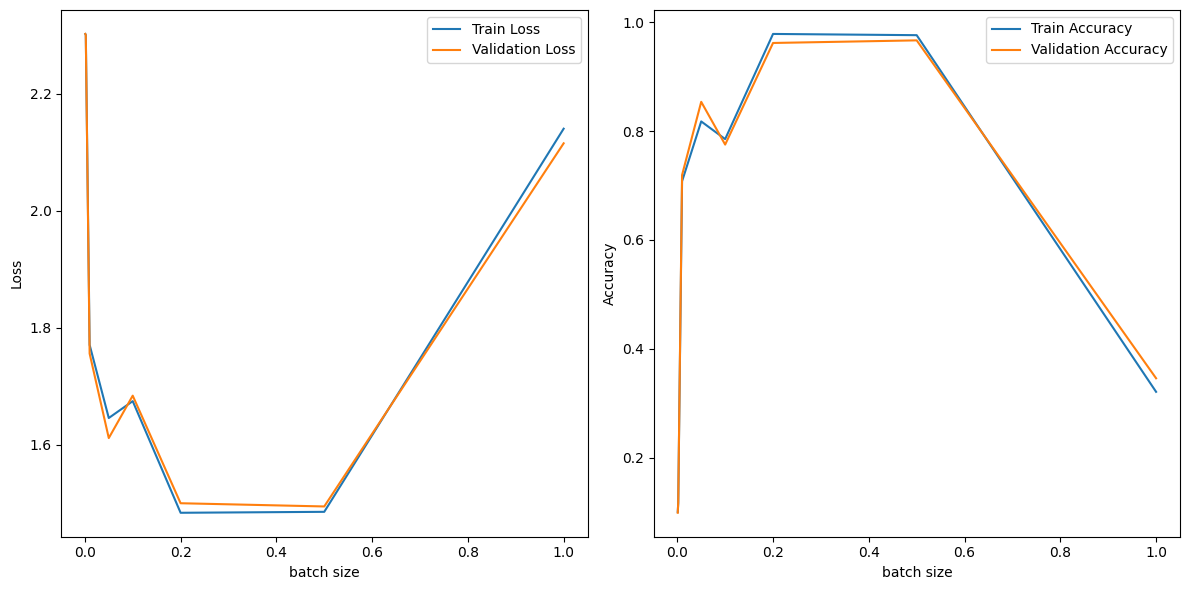

In [136]:
plt.figure(figsize=(12, 6))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(learning_rates, train_losses, label='Train Loss')
plt.plot(learning_rates, val_losses, label='Validation Loss')
plt.xlabel('batch size')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(learning_rates, train_accuracies, label='Train Accuracy')
plt.plot(learning_rates, val_accuracies, label='Validation Accuracy')
plt.xlabel('batch size')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()